In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

In [2]:
df=pd.read_csv('accepted_2007_to_2018Q4.csv')

/var/folders/b9/sybfjbkx1pg7r5bl3f56_tzm0000gn/T/ipykernel_28580/3961399125.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('accepted_2007_to_2018Q4.csv')


In [3]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [4]:
df=df[[
'loan_amnt'
,'term'
,'int_rate'
,'installment'
,'grade'
,'sub_grade'
,'emp_title'
,'emp_length'
,'home_ownership'
,'annual_inc'
,'verification_status'
,'issue_d'
,'loan_status'
,'purpose'
,'title'
,'dti'
,'fico_range_low'
,'fico_range_high'
,'earliest_cr_line'
,'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'initial_list_status', 
'application_type',
'mort_acc',
'pub_rec_bankruptcies']]
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,...,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,...,Feb-1995,5.0,0.0,8633.0,64.9,37.0,f,Individual,3.0,0.0
2260697,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,...,Jul-1999,10.0,1.0,17641.0,68.1,31.0,f,Individual,2.0,1.0
2260698,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,MORTGAGE,95000.0,...,Jun-1996,8.0,0.0,7662.0,54.0,22.0,w,Individual,1.0,0.0
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#kiểm tra lặp
df.duplicated().sum()

32

In [6]:
#xoá những dữ liệu trùng lặp
df[~df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,...,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,24000.0,60 months,12.79,543.50,C,C1,Unit Operator,7 years,MORTGAGE,95000.0,...,Dec-1999,5.0,0.0,49431.0,84.4,54.0,f,Individual,0.0,0.0
2260695,24000.0,60 months,10.49,515.74,B,B3,Database Administrator,10+ years,MORTGAGE,108000.0,...,Feb-1991,24.0,1.0,21665.0,39.0,58.0,f,Individual,4.0,0.0
2260696,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,...,Feb-1995,5.0,0.0,8633.0,64.9,37.0,f,Individual,3.0,0.0
2260697,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,...,Jul-1999,10.0,1.0,17641.0,68.1,31.0,f,Individual,2.0,1.0


# 1. Xử lý loan_status
Trạng thái hiện tại của khoản vay

In [7]:
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [8]:
def ChangeLoanInt(x):
    if x=='Fully Paid':
        return 1
    else: return 0
df['Loan_Status']=df['loan_status'].apply(ChangeLoanInt)


/var/folders/b9/sybfjbkx1pg7r5bl3f56_tzm0000gn/T/ipykernel_28580/1811861435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Status']=df['loan_status'].apply(ChangeLoanInt)


In [9]:
df['Loan_Status'].value_counts()

1    1076751
0     268559
Name: Loan_Status, dtype: int64

In [10]:
df = df.drop('loan_status',axis = 1)

# 2. Xử lý term
kì hạn khản vay tính bằng tháng 

In [11]:
df['term'].isna().sum()

0

In [12]:
df = df.dropna(subset=['term'])
df['term'] = df['term'].str.replace(' months', '').astype(int)

In [13]:
df.term.value_counts()

36    1020743
60     324567
Name: term, dtype: int64

In [14]:
df['term'].value_counts(normalize=True)

36    0.758742
60    0.241258
Name: term, dtype: float64

<AxesSubplot:xlabel='term', ylabel='count'>

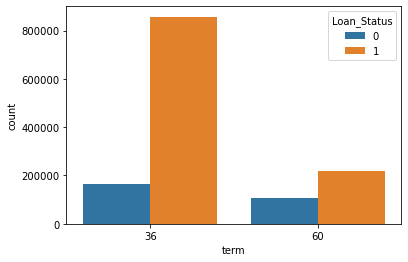

In [15]:
sns.countplot(x='term', hue='Loan_Status', data=df, order=sorted(df['term'].unique()))

In [16]:
df.groupby('term')['Loan_Status'].value_counts(normalize=True).loc[:,0]

term
36    0.159934
60    0.324454
Name: Loan_Status, dtype: float64

In [17]:
df.term.describe()

count    1.345310e+06
mean     4.179020e+01
std      1.026832e+01
min      3.600000e+01
25%      3.600000e+01
50%      3.600000e+01
75%      3.600000e+01
max      6.000000e+01
Name: term, dtype: float64

In [18]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,Loan_Status
0,3600.0,36,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0,1
1,24700.0,36,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0,1
2,20000.0,60,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0,1
4,10400.0,60,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0,1
5,11950.0,36,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,...,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0,1


# 3. int_rate
lãi suất khoản vay

In [19]:
df.int_rate.describe()

count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='int_rate'>

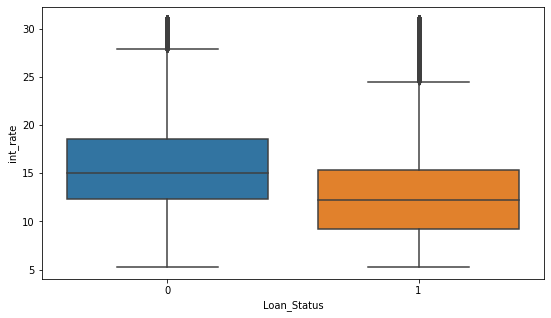

In [20]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, y='int_rate', x='Loan_Status')

In [21]:
df.groupby('Loan_Status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
0,268559.0,15.710714,4.910387,5.31,12.29,15.05,18.55,30.99
1,1076751.0,12.623288,4.527227,5.31,9.17,12.23,15.31,30.99


<AxesSubplot:>

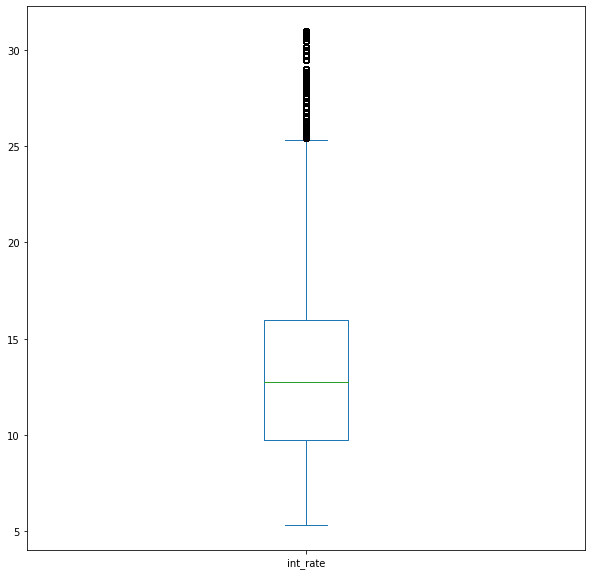

In [22]:
df['int_rate'].plot(kind='box', figsize=(10, 10))

In [23]:
#xử lý ngoại lai
q1 = df['int_rate'].quantile(0.25) # Tính Q1
q3 = df['int_rate'].quantile(0.75) # Tính Q3

iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [24]:
df = df[(lower < df['int_rate']) & (df['int_rate'] < upper)]

In [25]:
df.shape

(1320333, 28)

# 4. installment
khoản tiền phải trả mỗi tháng nếu người vay muốn vay

In [26]:
df.installment.describe()

count    1.320333e+06
mean     4.344403e+02
std      2.593900e+02
min      4.930000e+00
25%      2.468000e+02
50%      3.721200e+02
75%      5.742800e+02
max      1.587230e+03
Name: installment, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='installment'>

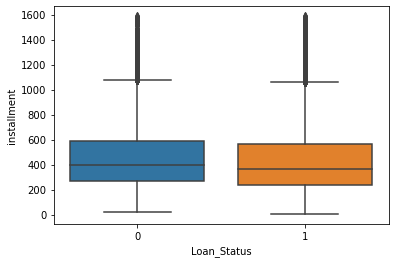

In [27]:
sns.boxplot(data=df, y='installment', x='Loan_Status')

In [28]:
df.groupby('Loan_Status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
0,256598.0,456.968374,258.401406,21.62,271.45,395.66,592.95,1587.23
1,1063735.0,429.006008,259.335256,4.93,240.05,366.37,568.71,1587.23


In [29]:
q1 = df['installment'].quantile(0.25) # Tính Q1
q3 = df['installment'].quantile(0.75) # Tính Q3

iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [30]:
df = df[(lower < df['installment']) & (df['installment'] < upper)]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278308 entries, 0 to 2260697
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1278308 non-null  float64
 1   term                  1278308 non-null  int64  
 2   int_rate              1278308 non-null  float64
 3   installment           1278308 non-null  float64
 4   grade                 1278308 non-null  object 
 5   sub_grade             1278308 non-null  object 
 6   emp_title             1195692 non-null  object 
 7   emp_length            1202481 non-null  object 
 8   home_ownership        1278308 non-null  object 
 9   annual_inc            1278308 non-null  float64
 10  verification_status   1278308 non-null  object 
 11  issue_d               1278308 non-null  object 
 12  purpose               1278308 non-null  object 
 13  title                 1262589 non-null  object 
 14  dti                   1277983 non-

# 5. grade, sub_grade
Hạng vay được gán bởi Lending Club

<AxesSubplot:xlabel='grade', ylabel='count'>

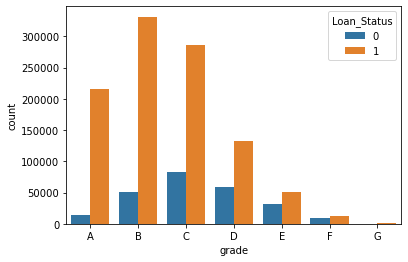

In [32]:
sns.countplot(x='grade', hue='Loan_Status', data=df, order=sorted(df['grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

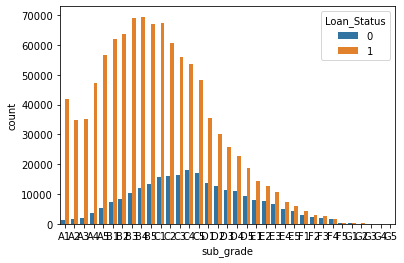

In [33]:
sns.countplot(x='sub_grade', hue='Loan_Status', data=df, order=sorted(df['sub_grade'].unique()))

In [34]:
# grade la tong quat cua sub_grade -> bo grade
df = df.drop('grade', axis = 1)


In [35]:
df.shape

(1278308, 27)

# 6. emp_title, emp_length
nghề nghiệp và thời gian làm việc của người vay

In [36]:
df.emp_title.describe()

count     1195692
unique     365021
top       Teacher
freq        20440
Name: emp_title, dtype: object

In [37]:
df = df.drop('emp_title', axis =1)

In [38]:
df.emp_length.describe()

count       1202481
unique           11
top       10+ years
freq         416932
Name: emp_length, dtype: object

<AxesSubplot:xlabel='emp_length', ylabel='count'>

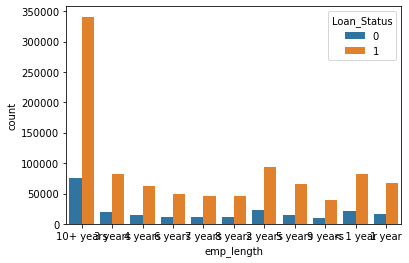

In [39]:
sns.countplot(x='emp_length', hue='Loan_Status', data=df)

In [40]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].Loan_Status.value_counts(normalize=True)}")

10+ years years in this position:
1    0.817416
0    0.182584
Name: Loan_Status, dtype: float64
3 years years in this position:
1    0.806345
0    0.193655
Name: Loan_Status, dtype: float64
4 years years in this position:
1    0.808914
0    0.191086
Name: Loan_Status, dtype: float64
6 years years in this position:
1    0.812043
0    0.187957
Name: Loan_Status, dtype: float64
7 years years in this position:
1    0.809066
0    0.190934
Name: Loan_Status, dtype: float64
8 years years in this position:
1    0.806142
0    0.193858
Name: Loan_Status, dtype: float64
2 years years in this position:
1    0.807953
0    0.192047
Name: Loan_Status, dtype: float64
5 years years in this position:
1    0.810234
0    0.189766
Name: Loan_Status, dtype: float64
9 years years in this position:
1    0.806446
0    0.193554
Name: Loan_Status, dtype: float64
< 1 year years in this position:
1    0.800076
0    0.199924
Name: Loan_Status, dtype: float64
1 year years in this position:
1    0.800782
0    0.19921

In [41]:
df = df.drop('emp_length', axis = 1)

In [42]:
df.shape

(1278308, 25)

# 7. home_ownership
trạng thái sở hữu nhà mà người vay cung cấp trong quá trình đăng ký

In [43]:
df['home_ownership'].value_counts()

MORTGAGE    627493
RENT        513107
OWN         137255
ANY            265
OTHER          142
NONE            46
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

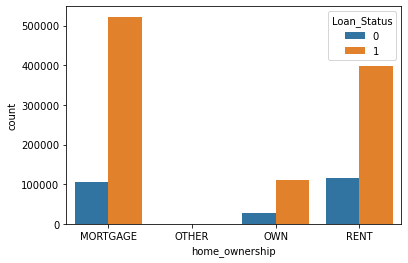

In [44]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
sns.countplot(x='home_ownership', hue='Loan_Status', data=df, order=sorted(df['home_ownership'].unique()))

In [45]:
df.loc[df['home_ownership']=='OTHER', 'Loan_Status'].value_counts()

1    371
0     82
Name: Loan_Status, dtype: int64

In [46]:
df.groupby('home_ownership')['Loan_Status'].value_counts(normalize=True)

home_ownership  Loan_Status
MORTGAGE        1              0.832557
                0              0.167443
OTHER           1              0.818985
                0              0.181015
OWN             1              0.800036
                0              0.199964
RENT            1              0.774786
                0              0.225214
Name: Loan_Status, dtype: float64

In [47]:
df = df.drop('home_ownership', axis = 1)

# 8.annual_inc
thu nhập hàng năm do người vay cung cấp

In [48]:
df.annual_inc.describe()

count    1.278308e+06
mean     7.401365e+04
std      6.661501e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [49]:
df.annual_inc.isna().sum()

0

In [50]:
df = df.dropna(subset=['annual_inc'])

In [51]:
df.annual_inc.isna().sum()

0

In [52]:
df = df.drop('annual_inc', axis =1 )

# 9. vertification_status
trạng thái xác nhận thu nhập của người vay 

In [53]:
df.verification_status.value_counts()

Source Verified    495712
Not Verified       401325
Verified           381271
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='count'>

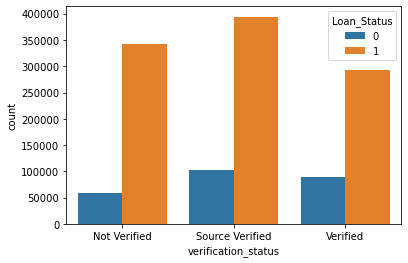

In [54]:
sns.countplot(data=df, x='verification_status', hue='Loan_Status')

In [55]:
def ChangeVerInt(x):
    if x=='Not Verified':
        return 0
    else: 
        return 1
df['Ver_status']=df['verification_status'].apply(ChangeVerInt)

<AxesSubplot:xlabel='Ver_status', ylabel='count'>

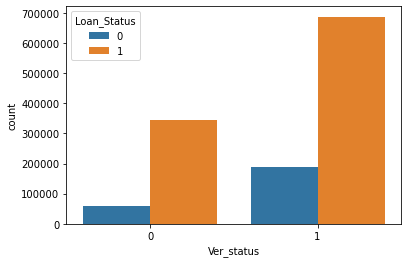

In [56]:
sns.countplot(data=df, x='Ver_status', hue='Loan_Status')

In [57]:
df = df.drop('verification_status',axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278308 entries, 0 to 2260697
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1278308 non-null  float64
 1   term                  1278308 non-null  int64  
 2   int_rate              1278308 non-null  float64
 3   installment           1278308 non-null  float64
 4   sub_grade             1278308 non-null  object 
 5   issue_d               1278308 non-null  object 
 6   purpose               1278308 non-null  object 
 7   title                 1262589 non-null  object 
 8   dti                   1277983 non-null  float64
 9   fico_range_low        1278308 non-null  float64
 10  fico_range_high       1278308 non-null  float64
 11  earliest_cr_line      1278308 non-null  object 
 12  open_acc              1278308 non-null  float64
 13  pub_rec               1278308 non-null  float64
 14  revol_bal             1278308 non-

# 10.issue_d
Thời gian mà khoản vay được cấp

In [59]:
df.issue_d.describe()

count      1278308
unique         139
top       Mar-2016
freq         46350
Name: issue_d, dtype: object

In [60]:
df = df.drop('issue_d',axis=1)

In [61]:
df.shape

(1278308, 22)

# 11. purpose 
lý do vay theo người vay cung cấp

In [62]:
df['purpose'].value_counts()

debt_consolidation    738727
credit_card           283951
home_improvement       82601
other                  74090
major_purchase         27997
medical                15065
car                    14323
small_business         13643
moving                  9128
vacation                8917
house                   6390
wedding                 2265
renewable_energy         885
educational              326
Name: purpose, dtype: int64

In [63]:
def ChangePurposeInt(x):
    if x=='debt_consolidation':
        return  0
    else:
        return 1
df['purpose']=df['purpose'].apply(ChangePurposeInt)

In [64]:
df['purpose'].value_counts()

0    738727
1    539581
Name: purpose, dtype: int64

# 12. title

In [65]:
df.title.value_counts()

Debt consolidation             622469
Credit card refinancing        239481
Home improvement                70516
Other                           63197
Major purchase                  22682
                                ...  
ezpay                               1
Goal: Debt Free                     1
New Loan App.                       1
Card Freedom Loan                   1
debt reduction/hone updates         1
Name: title, Length: 60737, dtype: int64

In [66]:
df = df.drop('title', axis = 1)

# 13. dti
tỉ lệ số tiền trả nợ trên tổng thu nhập

In [67]:
df.dti.describe()

count    1.277983e+06
mean     1.821040e+01
std      1.066314e+01
min     -1.000000e+00
25%      1.176000e+01
50%      1.756000e+01
75%      2.399000e+01
max      9.990000e+02
Name: dti, dtype: float64

/Users/truongduchoa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Debt-to-income Ratio')

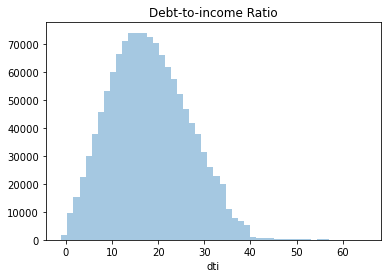

In [68]:
sns.distplot(df.loc[df['dti'].notnull() & (df['dti']<65), 'dti'], kde=False)
plt.title('Debt-to-income Ratio')

In [69]:
q1 = df['dti'].quantile(0.25) # Tính Q1
q3 = df['dti'].quantile(0.75) # Tính Q3

iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [70]:
df = df[(lower < df['dti']) & (df['dti'] < upper)]

In [71]:
df.shape

(1273324, 21)

In [72]:
df.groupby('Loan_Status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
0,246797.0,19.814544,8.542389,0.0,13.49,19.63,26.09,42.33
1,1026527.0,17.577257,8.260387,-1.0,11.39,17.04,23.33,42.33


# 14. earliest_cr_line
Tháng mà người vay mở tài khoản tín dụng đầu tiên được báo cáo.

In [73]:
df.earliest_cr_line.isnull().count()

1273324

In [74]:
df = df.drop('earliest_cr_line', axis = 1)

# 15. fico
điểm tín dụng

In [75]:
df[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,1.273324e+06,1.273324e+06
mean,6.962751e+02,7.002752e+02
std,3.194381e+01,3.194444e+01
min,6.250000e+02,6.290000e+02
25%,6.700000e+02,6.740000e+02
50%,6.900000e+02,6.940000e+02
75%,7.100000e+02,7.140000e+02
max,8.450000e+02,8.500000e+02


In [76]:
df['fico']=(df.fico_range_low+df.fico_range_high)/2
df.fico

0          677.0
1          717.0
2          697.0
4          697.0
5          692.0
           ...  
2260688    737.0
2260690    707.0
2260691    737.0
2260692    667.0
2260697    662.0
Name: fico, Length: 1273324, dtype: float64

In [77]:
df = df.drop(['fico_range_low', 'fico_range_high'], axis = 1)

<AxesSubplot:xlabel='Loan_Status', ylabel='fico'>

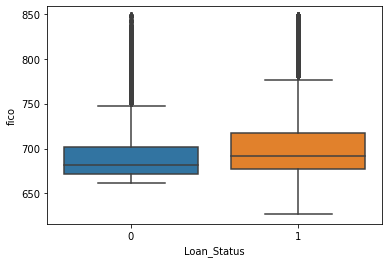

In [78]:
sns.boxplot(y='fico',x='Loan_Status', data=df)

In [79]:
df.groupby('Loan_Status')['fico'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
0,246797.0,689.975551,26.001440,662.0,672.0,682.0,702.0,847.5
1,1026527.0,700.270562,32.904015,627.0,677.0,692.0,717.0,847.5


# 16. open_acc
Số lượng các khoản tín dụng đang mở trong hồ sơ tín dụng của người vay 

In [80]:
df.open_acc.describe()

count    1.273324e+06
mean     1.151325e+01
std      5.428128e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      9.000000e+01
Name: open_acc, dtype: float64

<AxesSubplot:ylabel='open_acc'>

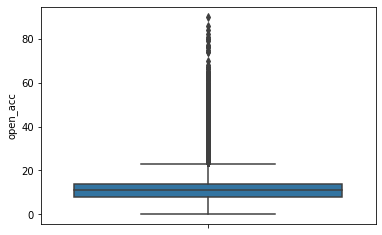

In [81]:
sns.boxplot(y='open_acc', data=df)

In [82]:
#lọc ngoại lai
q1 = df['open_acc'].quantile(0.25) # Tính Q1
q3 = df['open_acc'].quantile(0.75) # Tính Q3

iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [83]:
df = df[(lower < df['open_acc']) & (df['open_acc'] < upper)]

In [84]:
df.shape

(1220610, 19)

# 17. total_acc
Số lượng tất cả các tài khoản tín dụng hiện đang có trong hồ sơ tín dụng của người vay

In [85]:
df.total_acc.describe()

count    1.220610e+06
mean     2.386664e+01
std      1.094310e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.000000e+01
max      1.730000e+02
Name: total_acc, dtype: float64

<AxesSubplot:ylabel='total_acc'>

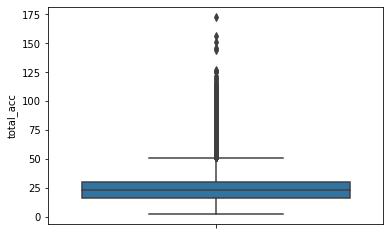

In [86]:
sns.boxplot(y='total_acc', data=df)

In [87]:
df.shape

(1220610, 19)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220610 entries, 0 to 2260697
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1220610 non-null  float64
 1   term                  1220610 non-null  int64  
 2   int_rate              1220610 non-null  float64
 3   installment           1220610 non-null  float64
 4   sub_grade             1220610 non-null  object 
 5   purpose               1220610 non-null  int64  
 6   dti                   1220610 non-null  float64
 7   open_acc              1220610 non-null  float64
 8   pub_rec               1220610 non-null  float64
 9   revol_bal             1220610 non-null  float64
 10  revol_util            1219822 non-null  float64
 11  total_acc             1220610 non-null  float64
 12  initial_list_status   1220610 non-null  object 
 13  application_type      1220610 non-null  object 
 14  mort_acc              1174130 non-

# 18. pub_rec
số bản ghi công khai về thông tiin xấu của người vay

In [89]:
df.pub_rec.value_counts()

0.0     1011276
1.0      175496
2.0       22336
3.0        6761
4.0        2383
5.0        1139
6.0         567
7.0         249
8.0         145
9.0          75
10.0         51
11.0         37
12.0         25
13.0         14
15.0          9
18.0          6
14.0          5
19.0          5
21.0          4
28.0          3
16.0          3
49.0          2
22.0          2
20.0          2
24.0          2
17.0          2
63.0          1
25.0          1
54.0          1
34.0          1
47.0          1
40.0          1
37.0          1
46.0          1
86.0          1
23.0          1
61.0          1
Name: pub_rec, dtype: int64

In [90]:
def pub_rec(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
df['pub_rec'] = df.pub_rec.apply(pub_rec)

In [91]:
df.shape

(1220610, 19)

# 19. revol_bal
Số dư nợ tín dụng quay vòng

In [92]:
df.revol_bal.describe()

count    1.220610e+06
mean     1.512616e+04
std      1.988189e+04
min      0.000000e+00
25%      5.727000e+03
50%      1.062300e+04
75%      1.853300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64

In [93]:
df.groupby('Loan_Status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
0,234946.0,14386.513654,16721.762733,0.0,5781.25,10573.0,17996.0,867528.0
1,985664.0,15302.459400,20559.683951,0.0,5715.00,10635.0,18668.0,2568995.0


<AxesSubplot:xlabel='Loan_Status', ylabel='revol_bal'>

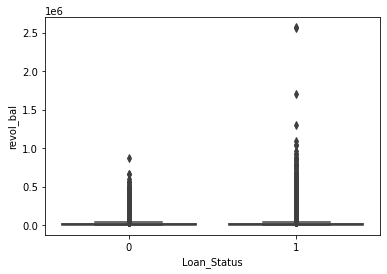

In [94]:
sns.boxplot(y='revol_bal', x ='Loan_Status', data=df)

In [95]:
q1 = df['revol_bal'].quantile(0.25) # Tính Q1
q3 = df['revol_bal'].quantile(0.75) # Tính Q3

iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [96]:
df = df[(lower < df['revol_bal']) & (df['revol_bal'] < upper)]

In [97]:
df.shape

(1150195, 19)

# 20. revol_util
Tỷ lệ sử dụng hạn mức quay vòng

In [98]:
df.revol_util.describe()

count    1.149470e+06
mean     5.104427e+01
std      2.438778e+01
min      0.000000e+00
25%      3.280000e+01
50%      5.120000e+01
75%      6.970000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='revol_util'>

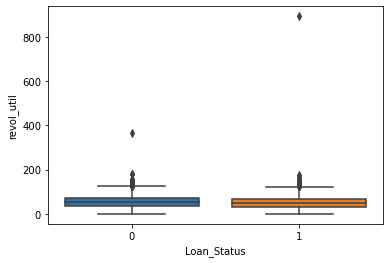

In [99]:
sns.boxplot(y='revol_util', x ='Loan_Status', data=df)

In [100]:
q1 = df['revol_util'].quantile(0.25) # Tính Q1
q3 = df['revol_util'].quantile(0.75) # Tính Q3

iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [101]:
df = df[(lower < df['revol_util']) & (df['revol_util'] < upper)]

In [102]:
df.shape

(1149405, 19)

# 21. initial_list_status
tình trạng niêm yết ban đầu của khoản vay

In [103]:
df.initial_list_status.describe()

count     1149405
unique          2
top             w
freq       663184
Name: initial_list_status, dtype: object

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

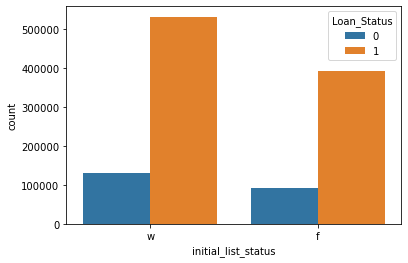

In [104]:
sns.countplot(x='initial_list_status',data=df,hue='Loan_Status')

In [105]:
df.loc[df.initial_list_status=='w','Loan_Status'].value_counts()
177932/(177932+623549)

0.222004015067107

In [106]:
df.loc[df.initial_list_status=='f','Loan_Status'].value_counts()
108478/(108478+409946)

0.20924571393299693

In [107]:
df = df.drop('initial_list_status', axis = 1)

# 22. application_type
người vay là cá nhân hay tổ chức

In [108]:
df['application_type'].value_counts(normalize=True)

Individual    0.985405
Joint App     0.014595
Name: application_type, dtype: float64

In [109]:
df.groupby('Loan_Status')['application_type'].describe()

,count,unique,top,freq
Loan_Status,,,,
0,223294,2,Individual,219451
1,926111,2,Individual,913178


<AxesSubplot:xlabel='application_type', ylabel='count'>

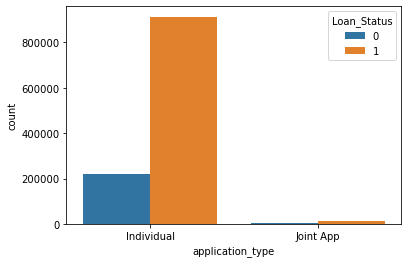

In [110]:
sns.countplot(x='application_type',data=df,hue='Loan_Status')

In [111]:
df.loc[df.application_type=='Individual','Loan_Status'].value_counts()
287656/(287656+1055834)

0.21411100938600214

In [112]:
df.loc[df.application_type=='Joint App','Loan_Status'].value_counts()
8344/(8344+18110)

0.315415438118999

In [113]:
df = df.drop('application_type', axis = 1)

# 23. mort_acc
số tài khoản thế chấp

In [114]:
df.mort_acc.value_counts()

0.0     473972
1.0     195211
2.0     156450
3.0     111624
4.0      74396
5.0      44213
6.0      24597
7.0      12515
8.0       6094
9.0       3043
10.0      1544
11.0       827
12.0       411
13.0       224
14.0       169
15.0        82
16.0        55
17.0        31
18.0        20
19.0        20
20.0        14
24.0        11
22.0         9
21.0         8
23.0         6
25.0         5
26.0         4
27.0         3
28.0         3
30.0         2
32.0         2
34.0         2
29.0         1
37.0         1
51.0         1
31.0         1
Name: mort_acc, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='mort_acc'>

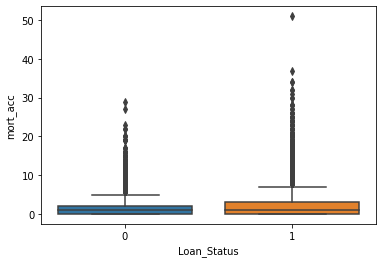

In [115]:
sns.boxplot(y='mort_acc', x ='Loan_Status', data=df)

In [116]:
q1 = df['mort_acc'].quantile(0.25) # Tính Q1
q3 = df['mort_acc'].quantile(0.75) # Tính Q3

iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [117]:
df = df[(lower < df['mort_acc']) & (df['mort_acc'] < upper)]

In [118]:
df.shape

(1092978, 17)

# 24. pub_rec_bankruptcies
số bản công khai thông tin phá sản của người vay

In [119]:
df.pub_rec_bankruptcies.value_counts()

0.0     942443
1.0     141469
2.0       7053
3.0       1463
4.0        354
5.0        128
6.0         42
7.0         14
8.0          7
9.0          3
11.0         1
12.0         1
Name: pub_rec_bankruptcies, dtype: int64

In [120]:
def pub_rec_bankruptcies(x):
    if x==0.0:
        return 0
    else:
        return 1
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

# 25. loan_amnt
số tiền khoản vay

In [121]:
df.loan_amnt.describe()

count    1.092978e+06
mean     1.316409e+04
std      7.622674e+03
min      1.000000e+03
25%      7.200000e+03
50%      1.200000e+04
75%      1.800000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='loan_amnt'>

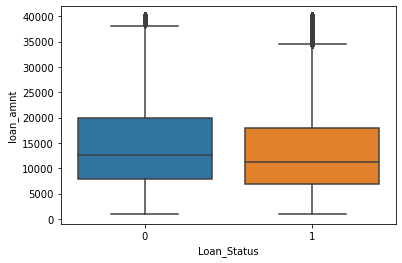

In [122]:
sns.boxplot(y='loan_amnt', x ='Loan_Status', data=df)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092978 entries, 0 to 2260697
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1092978 non-null  float64
 1   term                  1092978 non-null  int64  
 2   int_rate              1092978 non-null  float64
 3   installment           1092978 non-null  float64
 4   sub_grade             1092978 non-null  object 
 5   purpose               1092978 non-null  int64  
 6   dti                   1092978 non-null  float64
 7   open_acc              1092978 non-null  float64
 8   pub_rec               1092978 non-null  int64  
 9   revol_bal             1092978 non-null  float64
 10  revol_util            1092978 non-null  float64
 11  total_acc             1092978 non-null  float64
 12  mort_acc              1092978 non-null  float64
 13  pub_rec_bankruptcies  1092978 non-null  int64  
 14  Loan_Status           1092978 non-

In [124]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
Loan_Status             0
Ver_status              0
fico                    0
dtype: int64

In [125]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'purpose',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'Loan_Status', 'Ver_status',
       'fico'],
      dtype='object')

In [126]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092978 entries, 0 to 2260697
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1092978 non-null  float64
 1   term                  1092978 non-null  int64  
 2   int_rate              1092978 non-null  float64
 3   installment           1092978 non-null  float64
 4   sub_grade             1092978 non-null  object 
 5   purpose               1092978 non-null  int64  
 6   dti                   1092978 non-null  float64
 7   open_acc              1092978 non-null  float64
 8   pub_rec               1092978 non-null  int64  
 9   revol_bal             1092978 non-null  float64
 10  revol_util            1092978 non-null  float64
 11  total_acc             1092978 non-null  float64
 12  mort_acc              1092978 non-null  float64
 13  pub_rec_bankruptcies  1092978 non-null  int64  
 14  Loan_Status           1092978 non-

In [128]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
Loan_Status             0
Ver_status              0
fico                    0
dtype: int64

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

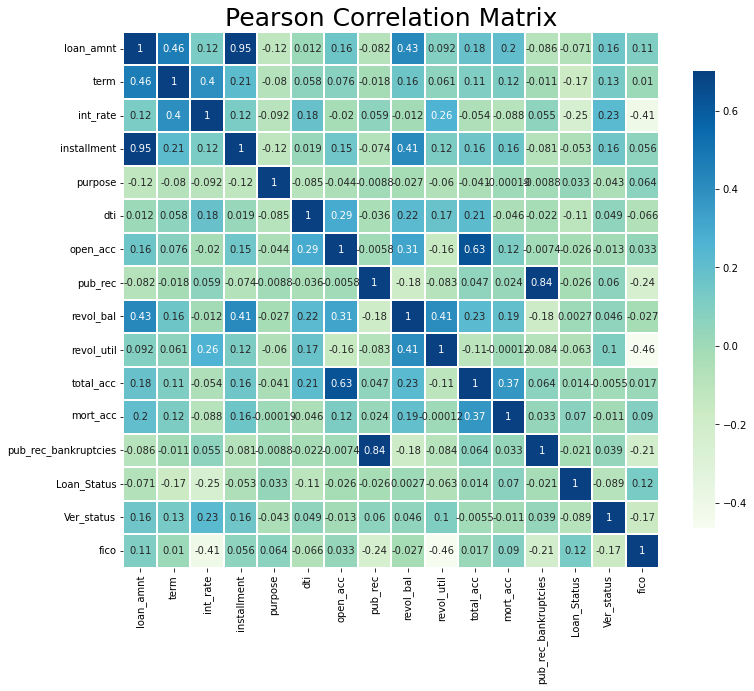

In [129]:
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .7})

In [130]:
df['new_pub_rec']=df['pub_rec']+df['pub_rec_bankruptcies']

In [131]:
df=df.drop(['pub_rec_bankruptcies','pub_rec'], axis=1)

In [132]:
df['new_pub_rec'].value_counts()

0    891431
2    150535
1     51012
Name: new_pub_rec, dtype: int64

In [133]:
def ChangNewPub(x):
    if x==0:
        return 0
    else:
        return 1
df['new_pub_rec']=df['new_pub_rec'].apply(ChangNewPub)

In [134]:
#có total_acc và open_acc đều nói về số tài khoản đang mở nên bỏ 1 cái
#có installment và loan_amnt đều nói về khoản nợ -> bỏ cái nhỏ hơn (installment)
df=df.drop(['total_acc','installment'], axis=1)

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

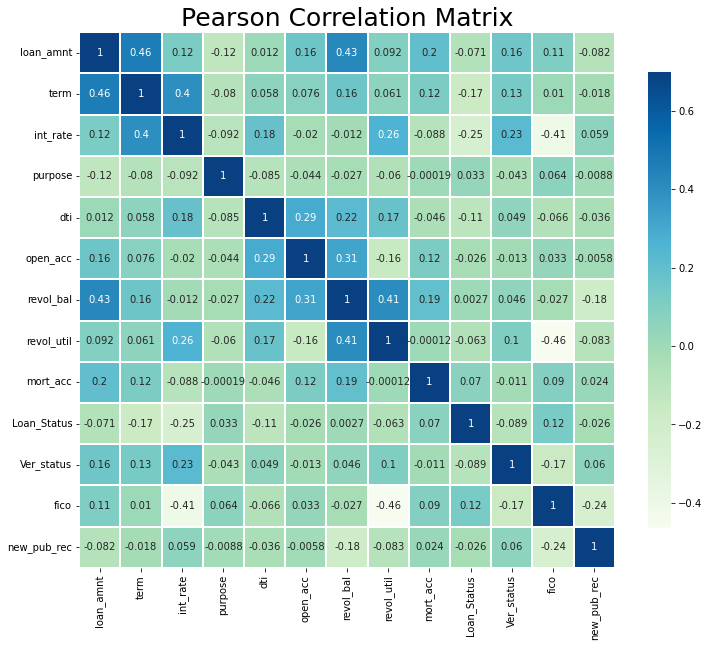

In [135]:
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .7})

# Modeling

In [136]:
input_fields=df.drop(columns=['Loan_Status','sub_grade']).columns.values

In [137]:
df['Ver_status'].value_counts()

1    747930
0    345048
Name: Ver_status, dtype: int64

In [138]:
X=df[input_fields]
Y=df['Loan_Status']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Model trước khi upsampling



In [140]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
model1= LogisticRegression()
model1.fit(X_train, y_train)
model1.coef_

/Users/truongduchoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-1.68890921e-05, -2.05700229e-02, -7.32618976e-02,
         2.30876838e-04, -3.99555264e-02, -1.14628370e-02,
         2.12378677e-05, -8.86230624e-04,  1.77078343e-02,
        -3.29938216e-03,  5.99124342e-03, -5.65147572e-04]])

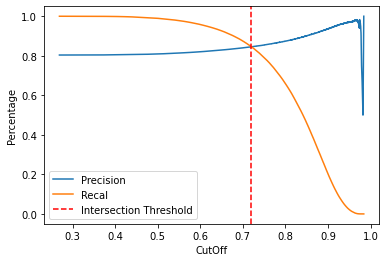

Intersection Threshold: 0.7202892138653104


In [142]:
from sklearn.metrics import precision_recall_curve,confusion_matrix
y_probs = model1.predict_proba(X_test)[:, 1]

# Tính Precision và Recall cho từng giá trị ngưỡng quyết định
Precision, Recal, thresholds = precision_recall_curve(y_test, y_probs)

# Tìm ngưỡng quyết định mà Precision và Recall cắt nhau
intersection_threshold = thresholds[np.argmax(Precision >= Recal)]

# Vẽ đồ thị Precision và Recall
plt.plot(thresholds, Precision[:-1], label='Precision')
plt.plot(thresholds, Recal[:-1], label='Recal')
plt.axvline(x=intersection_threshold, color='r', linestyle='--', label='Intersection Threshold')
plt.xlabel('CutOff')
plt.ylabel('Percentage')
plt.legend()
plt.show()

print("Intersection Threshold:", intersection_threshold)

In [143]:
predictions = model1.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, predictions))
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print('AUC', roc_auc_score(y_test, predictions))

Accuracy score: 0.8041013254283397
Confusion matrix:
[[  2869  61471]
 [  2763 260791]]
AUC 0.5170538070069577


# Model sau khi upsampling

In [144]:
!pip install imbalanced-learn

In [145]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_resample, y_train_resample=sm.fit_resample(X_train, y_train)

In [146]:
model=LogisticRegression()
model.fit(X_train_resample, y_train_resample)
model.coef_

/Users/truongduchoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-8.16142269e-06, -2.00086210e-02, -1.31610236e-01,
         2.13034952e-02, -2.40680585e-02, -1.56157107e-02,
         1.40080677e-05,  1.40362507e-04,  3.50047806e-02,
         8.98282425e-03,  4.55334757e-03,  1.22044027e-02]])

In [147]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.04      0.08     64340
           1       0.81      0.99      0.89    263554

    accuracy                           0.80    327894
   macro avg       0.66      0.52      0.49    327894
weighted avg       0.75      0.80      0.73    327894



/Users/truongduchoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics with Optimal Threshold for AUC:
optimal_threshold_auc 0.5214922590085059
Accuracy: 0.6289014132616029
AUC: 0.6955232135475602

Metrics with Optimal Threshold for Accuracy:
Accuracy: 0.8040067826797684
AUC: 0.6955232135475602
optimal_threshold_accuracy 0.1


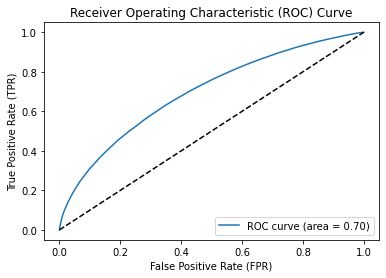

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Tạo mô hình Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_resample, y_train_resample)

# Dự đoán xác suất positive trên tập validation
y_probs_test = model.predict_proba(X_test)[:, 1]

# Tìm ngưỡng cắt tối ưu cho AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
optimal_threshold_auc = thresholds[np.argmax(tpr - fpr)]

# Dự đoán với ngưỡng cắt tối ưu cho AUC
y_pred_test_auc = (y_probs_test >= optimal_threshold_auc).astype(int)

# Đánh giá mô hình trên tập validation với ngưỡng cắt tối ưu cho AUC
accuracy_test_auc = accuracy_score(y_test, y_pred_test_auc)
roc_auc_test = roc_auc_score(y_test, y_probs_test)

print("Metrics with Optimal Threshold for AUC:")
print('optimal_threshold_auc',optimal_threshold_auc)
print("Accuracy:", accuracy_test_auc)
print("AUC:", roc_auc_test)

# Tìm ngưỡng cắt tối ưu cho accuracy
accuracy_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best_accuracy = 0
optimal_threshold_accuracy = 0

for threshold in accuracy_thresholds:
    y_pred_test_accuracy = (y_probs_test >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_test_accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        optimal_threshold_accuracy = threshold

# Dự đoán với ngưỡng cắt tối ưu cho accuracy
y_pred_test_accuracy = (y_probs_test >= optimal_threshold_accuracy).astype(int)

# Đánh giá mô hình trên tập validation với ngưỡng cắt tối ưu cho accuracy
accuracy_test_accuracy = accuracy_score(y_test, y_pred_test_accuracy)
roc_auc_test_accuracy = roc_auc_score(y_test, y_probs_test)

print("\nMetrics with Optimal Threshold for Accuracy:")
print("Accuracy:", accuracy_test_accuracy)
print("AUC:", roc_auc_test_accuracy)
print('optimal_threshold_accuracy',optimal_threshold_accuracy)
# Vẽ đồ thị ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

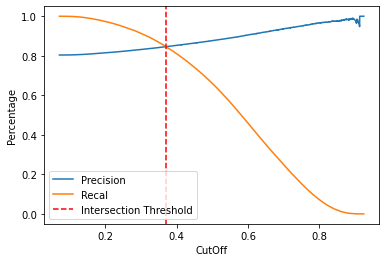

Intersection Threshold: 0.37013876504378357


In [149]:
from sklearn.metrics import precision_recall_curve

y_probs = model.predict_proba(X_test)[:, 1]

# Tính Precision và Recall cho từng giá trị ngưỡng quyết định
Precision, Recal, thresholds = precision_recall_curve(y_test, y_probs)

# Tìm ngưỡng quyết định mà Precision và Recall cắt nhau
intersection_threshold = thresholds[np.argmax(Precision >= Recal)]

# Vẽ đồ thị Precision và Recall
plt.plot(thresholds, Precision[:-1], label='Precision')
plt.plot(thresholds, Recal[:-1], label='Recal')
plt.axvline(x=intersection_threshold, color='r', linestyle='--', label='Intersection Threshold')
plt.xlabel('CutOff')
plt.ylabel('Percentage')
plt.legend()
plt.show()

print("Intersection Threshold:", intersection_threshold)

# Auc cải thiện phân loại đúng negative, positive

In [150]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

model.fit(X_train_resample, y_train_resample)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Iterate through thresholds from 0.1 to 1
for threshold in np.arange(0.1, 1.1, 0.05):
    # Convert probabilities to binary predictions based on the threshold
    y_pred_binary = np.where(y_pred_proba >= threshold, 1, 0)

    # Calculate metrics at the specified threshold
    auc_score = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)

    print(f'Threshold: {threshold:.2f}')
    print(f'AUC: {auc_score:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print('---')

/Users/truongduchoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Threshold: 0.10
AUC: 0.6955
Accuracy: 0.8040
Precision: 0.8043
Recall: 0.9993
---
Threshold: 0.15
AUC: 0.6955
Accuracy: 0.8038
Precision: 0.8082
Recall: 0.9910
---
Threshold: 0.20
AUC: 0.6955
Accuracy: 0.8006
Precision: 0.8147
Recall: 0.9732
---
Threshold: 0.25
AUC: 0.6955
Accuracy: 0.7939
Precision: 0.8228
Recall: 0.9476
---
Threshold: 0.30
AUC: 0.6955
Accuracy: 0.7818
Precision: 0.8319
Recall: 0.9131
---
Threshold: 0.35
AUC: 0.6955
Accuracy: 0.7628
Precision: 0.8418
Recall: 0.8679
---
Threshold: 0.40
AUC: 0.6955
Accuracy: 0.7349
Precision: 0.8528
Recall: 0.8100
---
Threshold: 0.45
AUC: 0.6955
Accuracy: 0.6984
Precision: 0.8643
Recall: 0.7412
---
Threshold: 0.50
AUC: 0.6955
Accuracy: 0.6523
Precision: 0.8765
Recall: 0.6604
---
Threshold: 0.55
AUC: 0.6955
Accuracy: 0.5944
Precision: 0.8900
Recall: 0.5652
---
Threshold: 0.60
AUC: 0.6955
Accuracy: 0.5272
Precision: 0.9054
Recall: 0.4598
---
Threshold: 0.65
AUC: 0.6955
Accuracy: 0.4549
Precision: 0.9205
Recall: 0.3522
---
Threshold: 0.70


/Users/truongduchoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold: 0.95
AUC: 0.6955
Accuracy: 0.1962
Precision: 0.0000
Recall: 0.0000
---


/Users/truongduchoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold: 1.00
AUC: 0.6955
Accuracy: 0.1962
Precision: 0.0000
Recall: 0.0000
---
Threshold: 1.05
AUC: 0.6955
Accuracy: 0.1962
Precision: 0.0000
Recall: 0.0000
---


/Users/truongduchoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


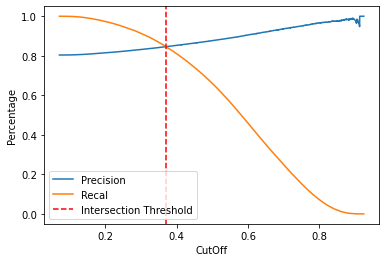

Intersection Threshold: 0.37013876504378357


In [151]:
from sklearn.metrics import precision_recall_curve

y_probs = model.predict_proba(X_test)[:, 1]

# Tính Precision và Recall cho từng giá trị ngưỡng quyết định
Precision, Recal, thresholds = precision_recall_curve(y_test, y_probs)

# Tìm ngưỡng quyết định mà Precision và Recall cắt nhau
intersection_threshold = thresholds[np.argmax(Precision >= Recal)]

# Vẽ đồ thị Precision và Recall
plt.plot(thresholds, Precision[:-1], label='Precision')
plt.plot(thresholds, Recal[:-1], label='Recal')
plt.axvline(x=intersection_threshold, color='r', linestyle='--', label='Intersection Threshold')
plt.xlabel('CutOff')
plt.ylabel('Percentage')
plt.legend()
plt.show()

print("Intersection Threshold:", intersection_threshold)

Threshold: 0.37
AUC: 0.6955
Accuracy: 0.7526
[[ 23783  40557]
 [ 40557 222997]]


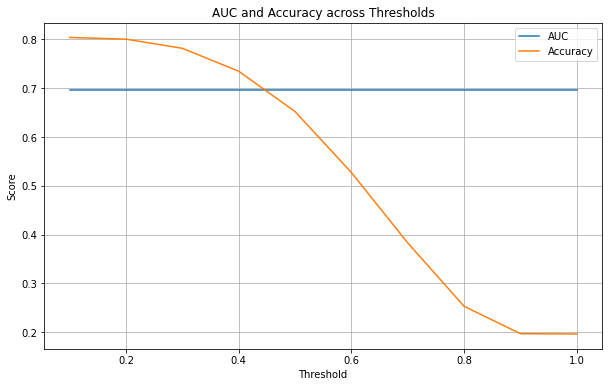

In [152]:
# Thử với threshols đã tìm được ở trên
threshold = 0.37013876504378357
y_pred_binary = np.where(y_pred_proba >= threshold, 1, 0)
auc_score = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Threshold: {threshold:.2f}')
print(f'AUC: {auc_score:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(confusion_matrix(y_test, y_pred_binary))

thresholds = np.arange(0.1, 1.1, 0.1)
auc_scores = []
accuracy_scores = []

for threshold in thresholds:
    y_pred_binary = np.where(y_pred_proba >= threshold, 1, 0)
    auc_scores.append(roc_auc_score(y_test, y_pred_proba))
    accuracy_scores.append(accuracy_score(y_test, y_pred_binary))

plt.figure(figsize=(10, 6))

plt.plot(thresholds, auc_scores, label='AUC')
plt.plot(thresholds, accuracy_scores, label='Accuracy')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('AUC and Accuracy across Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765084 entries, 20235 to 164053
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   loan_amnt    765084 non-null  float64
 1   term         765084 non-null  int64  
 2   int_rate     765084 non-null  float64
 3   purpose      765084 non-null  int64  
 4   dti          765084 non-null  float64
 5   open_acc     765084 non-null  float64
 6   revol_bal    765084 non-null  float64
 7   revol_util   765084 non-null  float64
 8   mort_acc     765084 non-null  float64
 9   Ver_status   765084 non-null  int64  
 10  fico         765084 non-null  float64
 11  new_pub_rec  765084 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 75.9 MB
